# Evaluación Final Módulo 3

## Ejercicio

Fase 1: Exploración y Limpieza

1. Exploración Inicial:
    - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
    nulos, atípicos o datos faltantes en las columnas relevantes.
    - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
    presencia de valores nulos y estadísticas básicas de las columnas involucradas.
    - Une los dos conjuntos de datos de la forma más eficiente.

In [343]:
# Importación de librerías 

# Tratamiento de datos
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # lo mismo para las filas

# Estadísticas
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [344]:
# Carga de ficheros
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_loyalty = pd.read_csv("Customer Loyalty History.csv")

# En ambos casos se opta por no usar el index_col=0 para poder usar la columna que se repite en ambos csv para hacer una unión

In [345]:
def eda_basico(df):
    print('🌷Ejemplo de datos del DF:')
    display(df.head(3))
    display(df.tail(3))
    display(df.sample(3))
    print('________________________________________________________________________________________________________')

    print('🌻Número de Filas:')
    display(df.shape[0])
    print('________________________________________________________________________________________________________')

    print('🌱Número de Columnas:')
    display(df.shape[1])
    print('________________________________________________________________________________________________________')

    print('🌼Información de la tabla:')
    display(df.info())
    print('________________________________________________________________________________________________________')

    print('🌑Nombre de las columnas:')
    display(df.columns)
    print('________________________________________________________________________________________________________')

    print('🍄Descripción de los datos numéricos:')
    display(df.describe().T)
    print('________________________________________________________________________________________________________')

    # Para evitar error si no hay columnas object
    obj_cols = df.select_dtypes(include='object')
    if obj_cols.shape[1] > 0:
        print('🌋Descripción de los datos no-numéricos:')
        display(df.describe(include='object').T)
    else:
        print('🌋 No hay columnas no-numéricas (object) en este dataset.')
    print('________________________________________________________________________________________________________')

    print('🍂Saber si hay datos únicos:')
    display(df.nunique())
    print('________________________________________________________________________________________________________')

    print('🐖Qué datos son nulos por columnas:')
    display(df.isnull().sum())
    print('________________________________________________________________________________________________________')

    print('🐲Filas duplicadas:')
    total_duplicados = df.duplicated().sum()
    if total_duplicados > 0:
        print(f'Cantidad de duplicados: {total_duplicados}')
        print('Primeros duplicados:')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    print('________________________________________________________________________________________________________')

    print('🪹 Columnas constantes (solo 1 valor único):')
    constantes = df.columns[df.nunique() <= 1]
    if len(constantes) > 0:
        print(f'{len(constantes)} columnas con 1 valor único:')
        display(constantes)
    else:
        print('No hay columnas constantes')
    print('________________________________________________________________________________________________________')

    print('🚀 Valores únicos en columnas categóricas:')
    for col in df.select_dtypes(include='object'):
        print(f'🔸 {col}')
        print('-----------------------------')
        print(df[col].unique())
        print('________________________________________________________________________________________________________')

    print('🧬 Tipos de datos por columna:')
    display(df.dtypes.value_counts())
    print('________________________________________________________________________________________________________')

In [346]:
# Customer Flight Activity
eda_basico(df_flight)

🌷Ejemplo de datos del DF:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
86874,226804,2017,6,0,0,0,0,0.0,0,0
25935,580592,2017,2,0,0,0,0,0.0,0,0
95759,698915,2017,6,0,0,0,0,0.0,0,0


________________________________________________________________________________________________________
🌻Número de Filas:


405624

________________________________________________________________________________________________________
🌱Número de Columnas:


10

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

None

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


________________________________________________________________________________________________________
🌋 No hay columnas no-numéricas (object) en este dataset.
________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

________________________________________________________________________________________________________
🐖Qué datos son nulos por columnas:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
Cantidad de duplicados: 1864
Primeros duplicados:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0


________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
No hay columnas constantes
________________________________________________________________________________________________________
🚀 Valores únicos en columnas categóricas:
🧬 Tipos de datos por columna:


int64      9
float64    1
Name: count, dtype: int64

________________________________________________________________________________________________________


In [347]:
# Customer Loyalty History
eda_basico(df_loyalty)

🌷Ejemplo de datos del DF:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
10047,581682,Canada,Quebec,Montreal,H2T 9K8,Male,College,NaN,Single,Star,2272.31,Standard,2013,11,NaN,NaN
16549,339371,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,95497.0,Single,Star,25805.51,Standard,2018,5,NaN,NaN
14309,574163,Canada,Ontario,Toronto,P1J 8T7,Male,College,NaN,Single,Star,6699.22,Standard,2013,10,NaN,NaN


________________________________________________________________________________________________________
🌻Número de Filas:


16737

________________________________________________________________________________________________________
🌱Número de Columnas:


16

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    

None

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

________________________________________________________________________________________________________
🐖Qué datos son nulos por columnas:


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
No hay duplicados
________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

________________________________________________________________________________________________________
🚀 Valores únicos en columnas categóricas:
🔸 Country
-----------------------------
['Canada']
________________________________________________________________________________________________________
🔸 Province
-----------------------------
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
________________________________________________________________________________________________________
🔸 City
-----------------------------
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
______________________

object     9
float64    4
int64      3
Name: count, dtype: int64

________________________________________________________________________________________________________


In [348]:
# Eliminamos los duplicados que se encontraron en el EDA Básico
def duplicados(df):
    duplicados_total = df.duplicated().sum()
    if duplicados_total > 0:
        print(f'Se eliminaron {duplicados_total} duplicados.')
        return df.drop_duplicates()
    else:
        print('No se encontraron duplicados.')
        return df

In [349]:
df_flight = duplicados(df_flight) # guardamos los cambios (eliminación de duplicados) en el DataFrame original

Se eliminaron 1864 duplicados.


In [350]:
# Unión de tablas
df = pd.merge(df_loyalty, df_flight, on='Loyalty Number', how='left')

# En ambos csv encontramos la columna 'Loyalty Number' por lo que se optará por unirlos a través de esta columna.
# En este caso además se opta por usar un merge left desde el csv de 'Customer Loyalty History' al csv de 'Customer Flight Activity' para que aparezcan todos los clientes
# aunque no hayan volado, en este caso aparecerán nulos que se gestionarán más adelante en el ejercicio.

2. Limpieza de Datos:
    - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
    estén completos.
    - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
    presenten de forma coherente.
    - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
    datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [351]:
eda_basico(df)

🌷Ejemplo de datos del DF:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
403757,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
403758,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0
403759,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
95635,636213,Canada,New Brunswick,Moncton,E1A 2A7,Female,College,NaN,Single,Aurora,24238.66,Standard,2013,2,NaN,NaN,2018,9,11,6,17,3094,309.0,545,44
275940,551510,Canada,Quebec,Montreal,H3T 8L4,Male,Bachelor,88470.0,Married,Star,2640.32,Standard,2015,5,NaN,NaN,2017,2,2,0,2,690,69.0,0,0
329774,319501,Canada,Ontario,Kingston,M9K 2P4,Female,Bachelor,95306.0,Married,Star,5395.09,Standard,2016,8,NaN,NaN,2017,8,7,7,14,4298,429.0,0,0


________________________________________________________________________________________________________
🌻Número de Filas:


403760

________________________________________________________________________________________________________
🌱Número de Columnas:


25

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       301500 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null 

None

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.576285,34983.929798,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Cancellation Year,49650.0,2016.504350,1.380482,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,49650.0,6.962095,3.454362,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:


,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Loyalty Number                 16737
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

________________________________________________________________________________________________________
🐖Qué datos son nulos por columnas:


Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
No hay duplicados
________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

________________________________________________________________________________________________________
🚀 Valores únicos en columnas categóricas:
🔸 Country
-----------------------------
['Canada']
________________________________________________________________________________________________________
🔸 Province
-----------------------------
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
________________________________________________________________________________________________________
🔸 City
-----------------------------
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
______________________

int64      11
object      9
float64     5
Name: count, dtype: int64

________________________________________________________________________________________________________


In [352]:
# 1º eliminamos columnas que no nos sirven o no son relevantes
df.drop('Country', axis=1, inplace=True) # el inplace=True para modificar el DataFrame original

# En este caso 'Country' solo tiene un valor único ('Canadá') por lo que esa información no es necesaria mantenerla, sabemos que todos los clientes son del mismo país
# de esta manera nos centramos en otra información más interesante como la provincia o la ciudad

In [353]:
# 2º En este caso no ha sido necesario renombrar u homogenizar el nombre de las columnas pues ya estaba todo normalizado en title (primeras letras en mayúscula)
# Pero si va a ser necesario modificar los datos de ciertas columnas
# En la columma 'Salary' tiene numeros negativos, por lo que vamos a pasarlos a absolutos
df['Salary'] = df['Salary'].abs()

In [354]:
# 3º modificamos el tipo de dato de algunas columnas (creamos primero nuevas columnas con fechas completas y borramos las columnas con datos separados )
def combinar_fecha(df, col_year, col_month, nueva_col):
    df[nueva_col] = pd.to_datetime(
        df[[col_year, col_month]].rename(columns={col_year: 'year', col_month: 'month'}).assign(day=1),
        errors='coerce'  # Esto convierte combinaciones inválidas en nulos
    ).dt.date  # esto convierte a solo fecha (sin hora)
    return df

In [355]:
# Aplicar la función para cada caso
df = combinar_fecha(df, 'Enrollment Year', 'Enrollment Month', 'Enrollment Date')
df = combinar_fecha(df, 'Cancellation Year', 'Cancellation Month', 'Cancellation Date')

In [356]:
# Borramos las columnas que duplican la información previamente unificada
df.drop(['Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month'], axis=1, inplace=True)

In [357]:
# Modificamos la columna 'Month' para convertir los números en nombres de meses
months = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Convertir columna month a nombre de mes
df['Month'] = df['Month'].map(months)

In [358]:
# 4º gestinamos los nulos 
df.isnull().sum()

Loyalty Number                      0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Enrollment Date                     0
Cancellation Date              354110
dtype: int64

In [359]:
# Tenemos dos columnas con nulos: 'Salary' y 'Cancellation Date'
(df['Cancellation Date'].isnull().sum() / df.shape[0]) * 100

87.70309094511592

In [360]:
# En primer lugar vamos a optar por eliminar la columna de 'Cancellation Date' pues al haber tantos nulos no nos es útil esa información y es una cantidad demasiado alta para imputarla
df.drop('Cancellation Date', axis=1, inplace=True)

In [361]:
# En segundo lugar vamos a imputar los nulos de la columna 'Salary'
print("La distribución de las categorías (incluyendo nulos) para la columna 'Salary':")
display(df['Salary'].value_counts(dropna=False, normalize=True) * 100)

La distribución de las categorías (incluyendo nulos) para la columna 'Salary':


Salary
NaN         25.326927
101933.0     0.136715
51573.0      0.083218
61809.0      0.083218
62283.0      0.083218
64001.0      0.077274
76159.0      0.076531
81765.0      0.075540
57870.0      0.075045
78573.0      0.071577
87782.0      0.071330
72656.0      0.071330
112860.0     0.071330
70384.0      0.071330
100817.0     0.071330
79329.0      0.071330
92259.0      0.071330
84988.0      0.071330
74756.0      0.071330
85447.0      0.071330
76622.0      0.071330
92396.0      0.071330
72409.0      0.071330
59169.0      0.071330
114551.0     0.071330
89435.0      0.071330
71792.0      0.071330
84147.0      0.071330
64417.0      0.071330
250253.0     0.071330
81333.0      0.071330
64680.0      0.071330
100159.0     0.071330
67445.0      0.071330
58725.0      0.071330
75891.0      0.071330
65935.0      0.071330
84015.0      0.071330
54457.0      0.071330
199894.0     0.071330
80816.0      0.071330
51510.0      0.071330
90265.0      0.071330
56644.0      0.071330
75827.0      0.071330
833

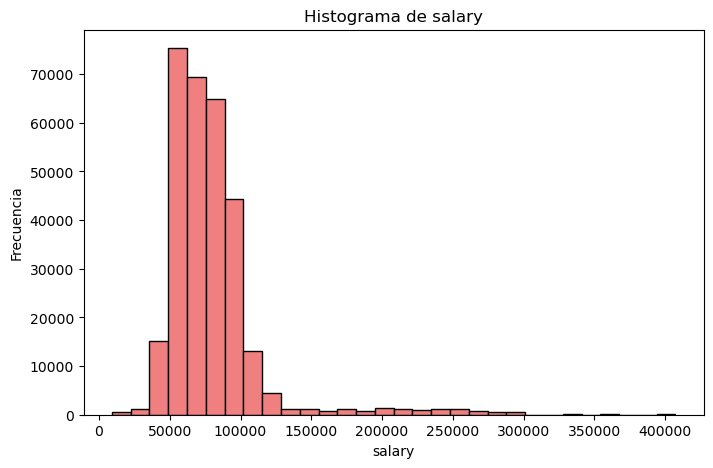

In [362]:
plt.figure(figsize=(8, 5))
plt.hist(df['Salary'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Histograma de salary')
plt.xlabel('salary')
plt.ylabel('Frecuencia')
plt.show()

In [363]:
# En este caso al tener un % de nulos relativamente alta (25%) se ha optado por usar una técnica avanzada, concretamente IterativeImputer, pues imputará los nulos según la correlación 
# entre otras variables ('Education', 'Gender',...) centrándose en cómo influyen las columnas entre sí, y además al ser un DataFrame grande es mejor esta técnica
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df['Salary'] = imputer_iter.fit_transform(df[['Salary']])

In [364]:
# Comprobamos si queda algún nulo
df.isnull().sum()

Loyalty Number                 0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Enrollment Date                0
dtype: int64

In [365]:
# Finalmente guardamos el csv limpio
df.to_csv('Customers Data Clean.csv')

Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:

- ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
- ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
- ¿Cuál es la distribución de los clientes por provincia o estado?
- ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
- ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
- ¿Cómo se distribuyen los clientes según su estado civil y género?

In [366]:
df_vuelos = df.groupby('Month')['Flights Booked'].sum().sort_index()

In [367]:
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']

df_vuelos_ordenado = df_vuelos.reindex(meses_ordenados)

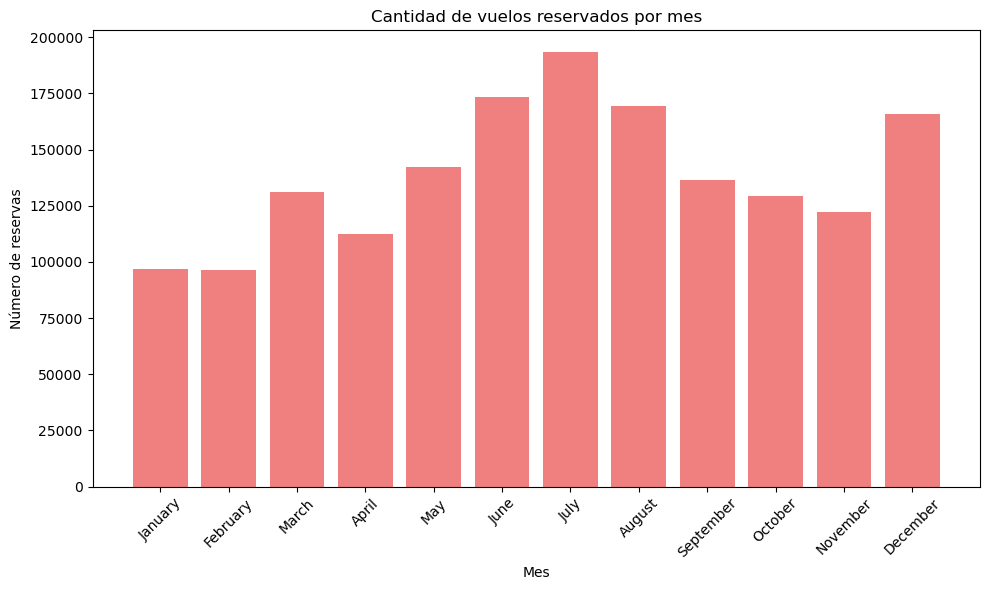

In [368]:
plt.figure(figsize=(10, 6))
plt.bar(x=df_vuelos_ordenado.index, height=df_vuelos_ordenado.values, color='lightcoral')

plt.xticks(rotation=45)
plt.title("Cantidad de vuelos reservados por mes")
plt.xlabel('Mes')
plt.ylabel('Número de reservas')
plt.tight_layout()
plt.show()

In [369]:
# En esta gráfica podemos ver como son los meses entre junio y agosto, junto con diciembre, los meses con mayor número de reservas
# Al estar hablando de Canadá coincide con las vacaciones de verano y la Navidad

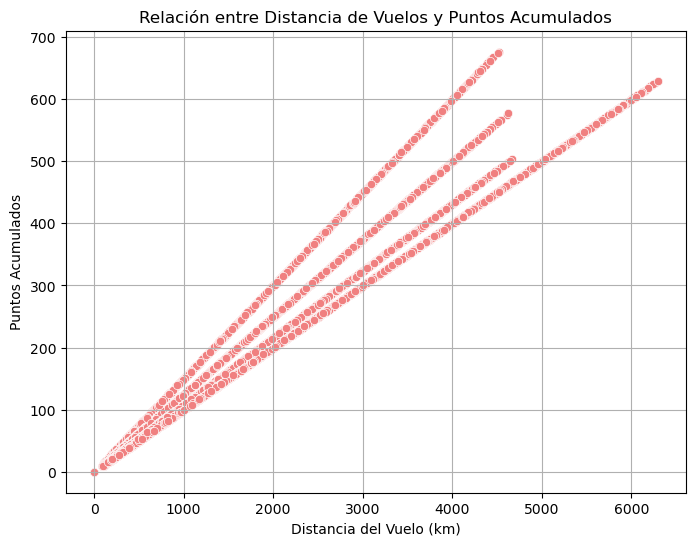

In [370]:
# 2:
plt.figure(figsize=(8,6))
sns.scatterplot(data= df, x=df['Distance'], y=df['Points Accumulated'], color='lightcoral')
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia del Vuelo (km)')
plt.ylabel('Puntos Acumulados')
plt.grid(True) #cuadrícula
plt.show()

In [371]:
# En esta gráfica podemos ver claramente como hay una correlación positiva entre la distancia y
# el número de puntos acumulados por los clientes, lo que nos dice que a mayor distancia mayor
# cantidad de puntos

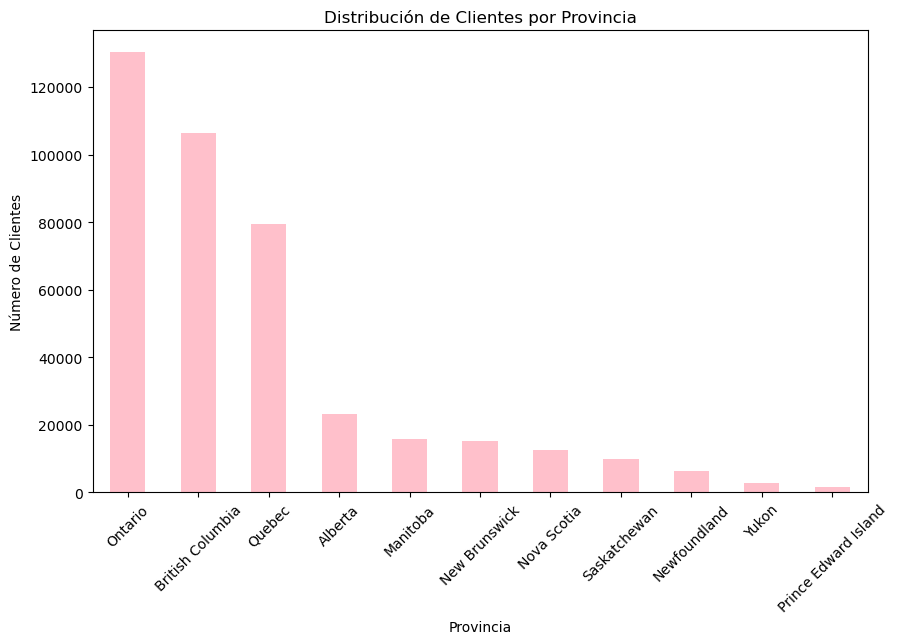

In [372]:
# 3:
# Contar clientes por provincia
conteo_provincias = df['Province'].value_counts()

# Graficar barras
plt.figure(figsize=(10,6))
conteo_provincias.plot(kind='bar', color='pink')
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

In [373]:
# En este gráfico vemos como la mayoría de los clientes se concentran en la provincias de 
# Ontario y British Columbia, lo que tiene sentido siendo esta primera provincia donde se encuentra 
# la capital del país (Ottawa)

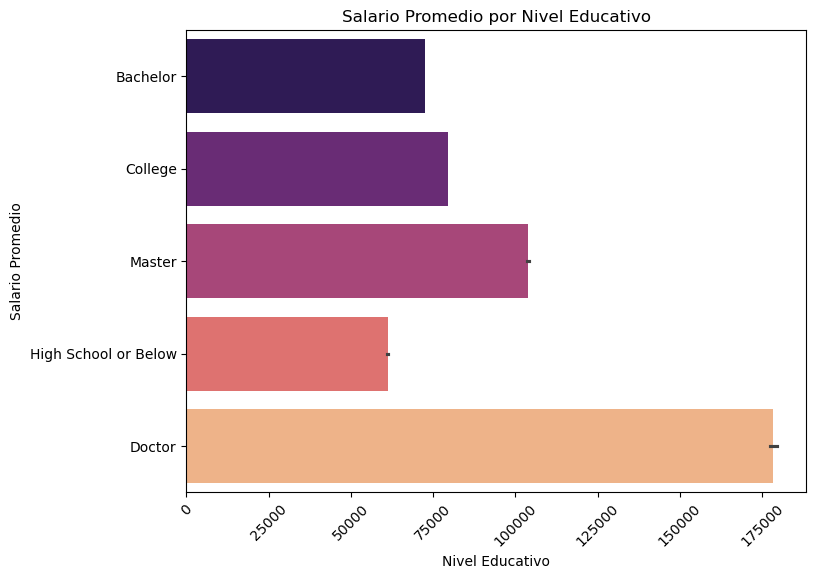

In [374]:
# 4: 
# Calcular salario promedio por nivel educativo
promedio_salario = df.groupby('Education')['Salary'].mean().sort_values()

# Graficar barras
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Salary', y='Education', palette='magma') 
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45)
plt.show()

In [375]:
# Este gráfico nos muestra que las personas con mayor nivel educativo (Doctor y Master)
# son los que en promedio tienen un sueldo mayor

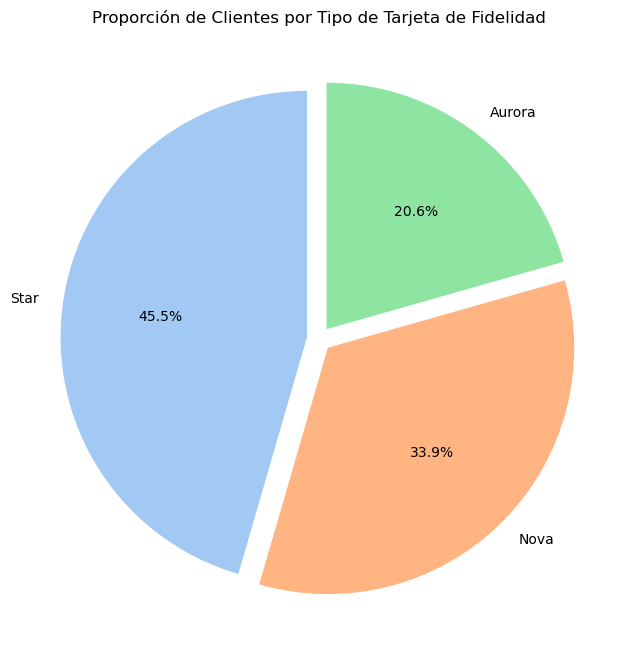

In [376]:
# 5:
# Contar clientes por tipo de tarjeta
conteo_tarjetas = df['Loyalty Card'].value_counts()

# Graficar pastel
plt.figure(figsize=(8,8))
plt.pie(conteo_tarjetas, 
        labels=conteo_tarjetas.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel', len(conteo_tarjetas)),
        explode=[0.05]*len(conteo_tarjetas))
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.ylabel('')  # Quitar etiqueta del eje Y
plt.show()

In [377]:
# A través de esta gráfica vemos como se dividen los porcentajes de los tres tipos de
# tarjeta de fidelidad, siendo la 'Star' la que mayor cantidad de clientes tiene

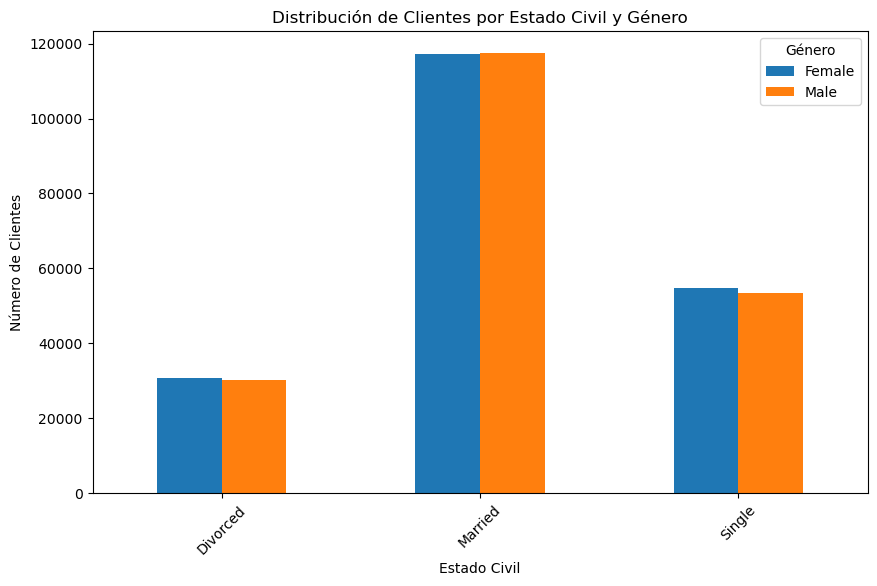

In [378]:
# 6:
# Contar clientes por estado civil y género
conteo = df.groupby(['Marital Status', 'Gender']).size().unstack()

# Graficar barras agrupadas
conteo.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()

# Tambien podría hacerse con un sns.countplot(x='Marital Status', data=df, hue = 'Gender')

In [379]:
# Y esta última tabla nos muestra que la mayor parte de sus clientes están casados y por 
# otro lado que no existe una gran diferencia entre hombres y mujeres en ninguno de los tres grupos
# Hay mayor cantidad de mujeres divorcidas y solteras que hombres, pero en un porcentaje muy pequeño

## BONUS 

Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberás seguir son:

- `Preparación de Datos:` Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.
- `Análisis Descriptivo:` Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
grupo.
- `Prueba Estadística:` Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [380]:
# Creamos la variable en la que solo se usen los datos de las columnas 'Flights Booked' y 'Education'
df_filtrado = df[['Flights Booked', 'Education']]

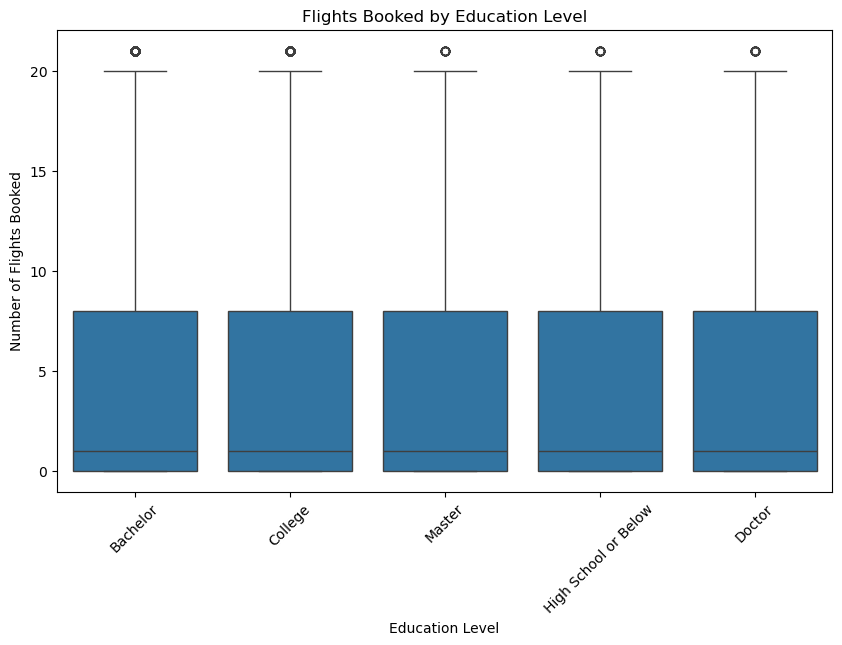

In [381]:
# Lo observamos en una gráfica
plt.figure(figsize=(10,6))
sns.boxplot(x='Education', y='Flights Booked', data=df_filtrado)
plt.title('Flights Booked by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Flights Booked')
plt.xticks(rotation=45)
plt.show()

In [382]:
# Agrupar por nivel educativo y calcular estadísticas descriptivas de 'Flights Booked'
estadisticas = df_filtrado.groupby('Education')['Flights Booked'].agg(
    count='count',
    mean='mean',
    std='std',
    var='var',
    min='min',
    median='median',
    max='max'
).reset_index()

display(estadisticas) # para que salga en forma de tabla

,Education,count,mean,std,var,min,median,max
0,Bachelor,252567,4.110288,5.221671,27.265843,0,1.0,21
1,College,102260,4.169744,5.246040,27.520938,0,1.0,21
2,Doctor,17731,4.175512,5.256971,27.635748,0,1.0,21
3,High School or Below,18915,4.176209,5.239267,27.449915,0,1.0,21
4,Master,12287,4.200700,5.213956,27.185339,0,1.0,21


In [383]:
# Otra forma de realizar las estadísticas de este df
estadisticas_educacion = df.groupby('Education')['Flights Booked'].describe()
estadisticas_educacion

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


In [384]:
# Separamos en dos grupos segun nivel educativo para poder realizar otros test y comprobar la hipótesis
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50: #aquí vamos a decidir hacer komogorov porque es más potente y shapiro solo en muestras pequeñas
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales, all() solo devuelve True si todos los elementos son True

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

In [385]:
grupo_educacion_basica = df[df['Education'].isin(['High School or Below', 'Bachelor'])]['Flights Booked']
grupo_educacion_superior = df[df['Education'].isin(['College', 'Master', 'Doctor'])]['Flights Booked']
prueba_hipotesis(grupo_educacion_basica, grupo_educacion_superior)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Desiguales (p = 0.0014)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 17843524308.0000, p-valor: 0.0006
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [386]:
# Despues de realizar la prueba de hipótesis observamos que existen diferencias significativas 
# entre los dos grupos que hemos creado (educación básica y educación superior)